In [6]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import sys
print(sys.executable)


c:\Users\rajon\.pyenv\pyenv-win\versions\3.8.10\python.exe


   sentiment_score  emotion_score  real_emotion_score      vote
0         0.411111       0.461778            1.129111  Congress
1         0.000000       0.284773            0.569545       BJP
2        -0.033333       0.201111            0.385556  Congress
3         0.000000       0.202424            0.404848       BJP
4         0.500000       0.244211            0.738421       BJP


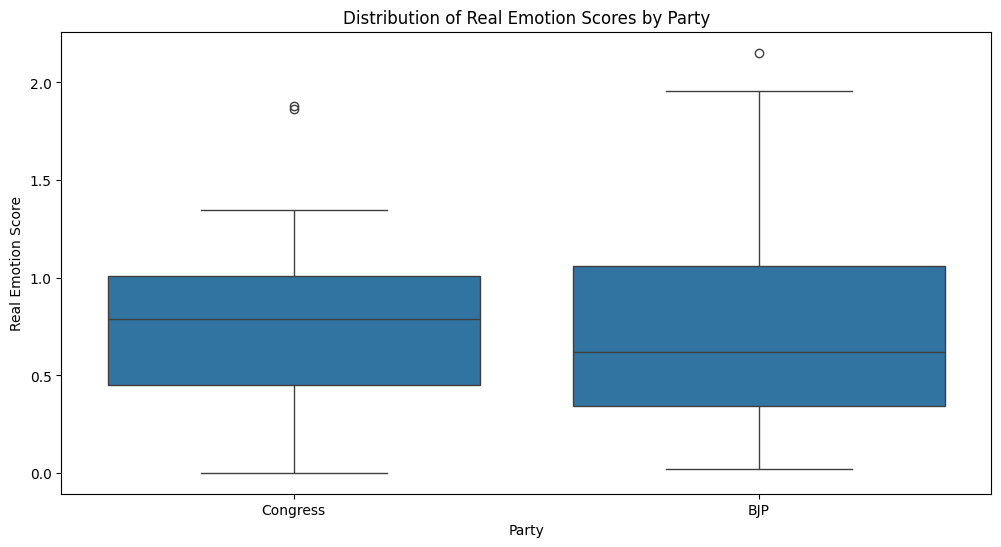

C:\Users\rajon\AppData\Local\Temp\ipykernel_22256\496962548.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote', y='real_emotion_score', data=avg_scores, palette="viridis")


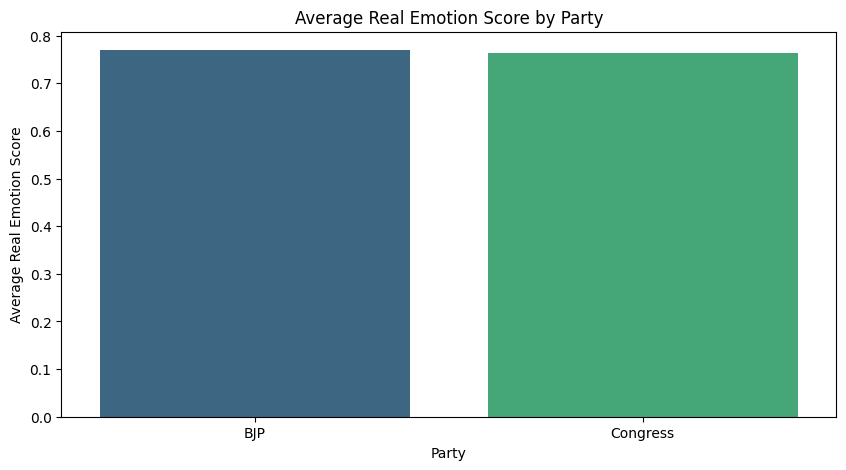

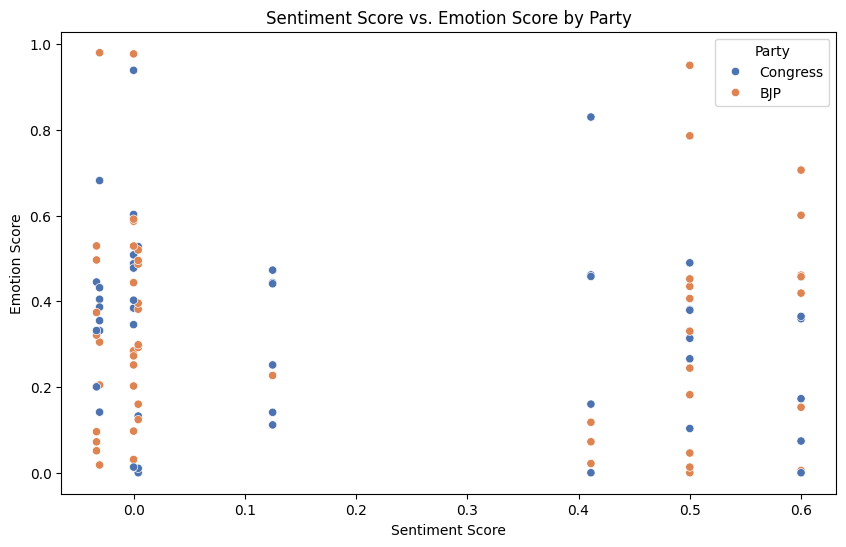

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your updated dataset
df = pd.read_excel("Updated_Indian_Election_Data.xlsx")

# Define weights for each score
alpha = 0.5  # Weight for sentiment score
beta = 2   # Weight for emotion score

# Calculate Real Emotion Score
df['real_emotion_score'] = alpha * df['sentiment_score'] + beta * df['emotion_score']

# Display the first few rows to verify
# Display the first few rows to verify with the correct column name
print(df[['sentiment_score', 'emotion_score', 'real_emotion_score', 'vote']].head())


# Plotting

# 1. Distribution of Real Emotion Scores for each Party
plt.figure(figsize=(12, 6))
sns.boxplot(x='vote', y='real_emotion_score', data=df)
plt.title("Distribution of Real Emotion Scores by Party")
plt.xlabel("Party")
plt.ylabel("Real Emotion Score")
plt.show()

# 2. Average Real Emotion Score for each Party
avg_scores = df.groupby('vote')['real_emotion_score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='vote', y='real_emotion_score', data=avg_scores, palette="viridis")
plt.title("Average Real Emotion Score by Party")
plt.xlabel("Party")
plt.ylabel("Average Real Emotion Score")
plt.show()


# 3. Scatter Plot of Sentiment Score vs. Emotion Score Colored by Party
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_score', y='emotion_score', hue='vote', data=df, palette="deep")
plt.title("Sentiment Score vs. Emotion Score by Party")
plt.xlabel("Sentiment Score")
plt.ylabel("Emotion Score")
plt.legend(title="Party")
plt.show()

